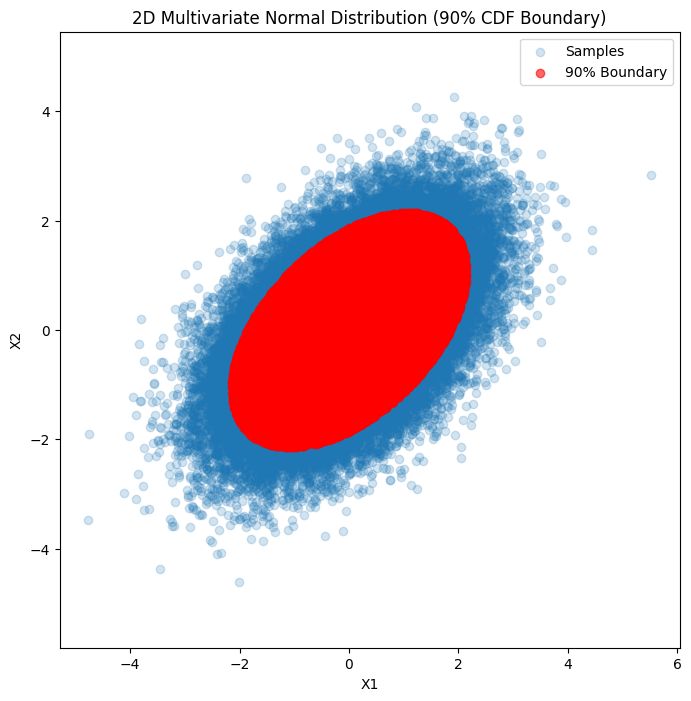

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, multivariate_normal

# 다변량 정규분포 매개변수
mu = np.array([0, 0])  # 평균
Sigma = np.array([[1, 0.5], [0.5, 1]])  # 공분산 행렬

# 샘플링
N = 100000  # 샘플 크기
samples = np.random.multivariate_normal(mu, Sigma, N)

# 마할라노비스 거리 계산
inv_Sigma = np.linalg.inv(Sigma)
distances = np.array([np.dot((x - mu).T, np.dot(inv_Sigma, (x - mu))) for x in samples])

# Chi-squared 분포 임계값 (90% CDF)
critical_value = chi2.ppf(0.9, df=2)

# 경계 추출
boundary_samples = samples[distances <= critical_value]

# 시각화
plt.figure(figsize=(8, 8))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.2, label='Samples')
plt.scatter(boundary_samples[:, 0], boundary_samples[:, 1], color='red', alpha=0.6, label='90% Boundary')
plt.title("2D Multivariate Normal Distribution (90% CDF Boundary)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.axis('equal')
plt.show()


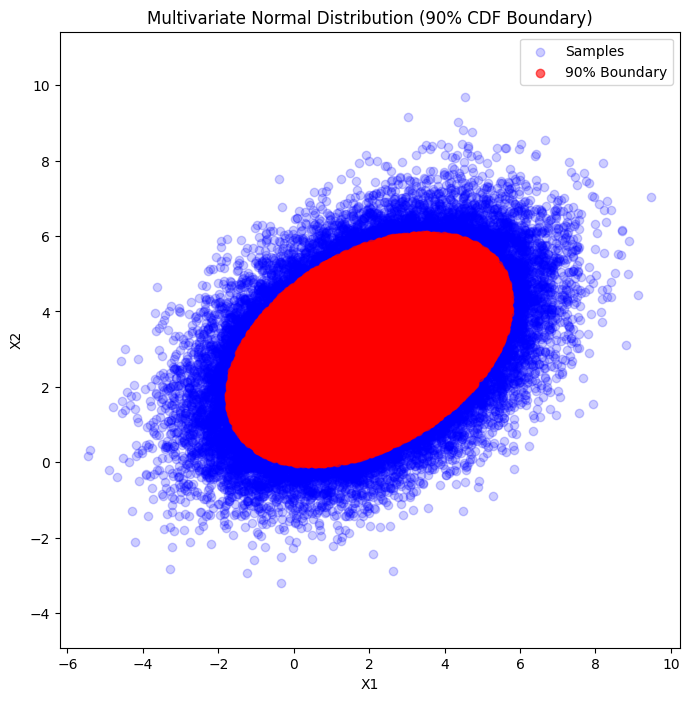

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, multivariate_normal

# 1. 다변량 정규분포 매개변수
mu = np.array([2, 3])  # 평균: 중심이 아님
Sigma = np.array([[3, 1], [1, 2]])  # 공분산 행렬: 대칭, 양의 정부호

# 2. 샘플링
N = 100000  # 샘플 수
samples = np.random.multivariate_normal(mu, Sigma, N)

# 3. 마할라노비스 거리 계산
inv_Sigma = np.linalg.inv(Sigma)
distances = np.array([np.dot((x - mu).T, np.dot(inv_Sigma, (x - mu))) for x in samples])

# 4. Chi-squared 분포 임계값 (90% CDF)
critical_value = chi2.ppf(0.9, df=2)

# 5. 경계 추출
boundary_samples = samples[distances <= critical_value]

# 6. 시각화
plt.figure(figsize=(8, 8))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.2, label='Samples', color='blue')
plt.scatter(boundary_samples[:, 0], boundary_samples[:, 1], color='red', alpha=0.6, label='90% Boundary')
plt.title("Multivariate Normal Distribution (90% CDF Boundary)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.axis('equal')
plt.show()


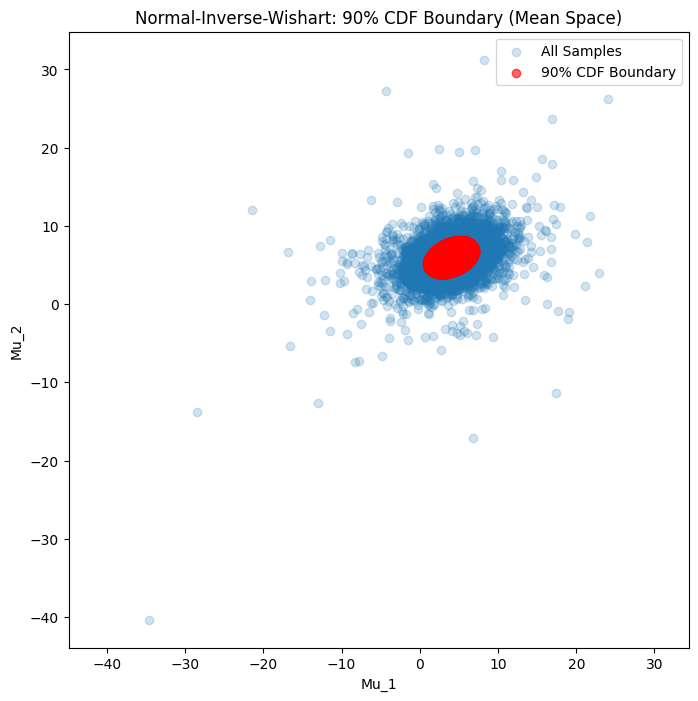

In [3]:
import numpy as np
from scipy.stats import invwishart, multivariate_normal

# 1. Normal-Inverse-Wishart 분포의 매개변수 설정
mu0 = np.array([4, 6])  # 평균 벡터의 사전 평균
kappa0 = 1.2            # 평균 벡터의 사전 정확도
Psi = np.array([[2, 0.5], [0.5, 1]])  # 스케일 행렬
nu = 4                  # 자유도 (nu > k-1, 여기서는 k=2)

# 2. 샘플링
N = 100000  # 샘플 수
samples_mu = []
samples_Sigma = []

for _ in range(N):
    # 공분산 행렬 샘플링 (Inverse Wishart)
    Sigma = invwishart.rvs(df=nu, scale=Psi)
    # 평균 벡터 샘플링 (Multivariate Normal)
    mu = multivariate_normal.rvs(mean=mu0, cov=Sigma / kappa0)
    samples_mu.append(mu)
    samples_Sigma.append(Sigma)

samples_mu = np.array(samples_mu)
samples_Sigma = np.array(samples_Sigma)

# 3. 마할라노비스 거리 기반 경계 계산
# 기준점을 평균으로 설정
mean_mu = np.mean(samples_mu, axis=0)
mean_Sigma = np.mean(samples_Sigma, axis=0)

inv_mean_Sigma = np.linalg.inv(mean_Sigma)
mahalanobis_distances = [
    (mu - mean_mu).T @ inv_mean_Sigma @ (mu - mean_mu)
    for mu in samples_mu
]

# Chi-squared 임계값 (90% CDF, 자유도 2)
from scipy.stats import chi2
critical_value = chi2.ppf(0.9, df=2)

# 4. 90% CDF 경계에 해당하는 샘플 추출
boundary_mu = samples_mu[np.array(mahalanobis_distances) <= critical_value]

# 5. 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(samples_mu[:, 0], samples_mu[:, 1], alpha=0.2, label="All Samples")
plt.scatter(boundary_mu[:, 0], boundary_mu[:, 1], color="red", alpha=0.6, label="90% CDF Boundary")
plt.title("Normal-Inverse-Wishart: 90% CDF Boundary (Mean Space)")
plt.xlabel("Mu_1")
plt.ylabel("Mu_2")
plt.legend()
plt.axis("equal")
plt.show()


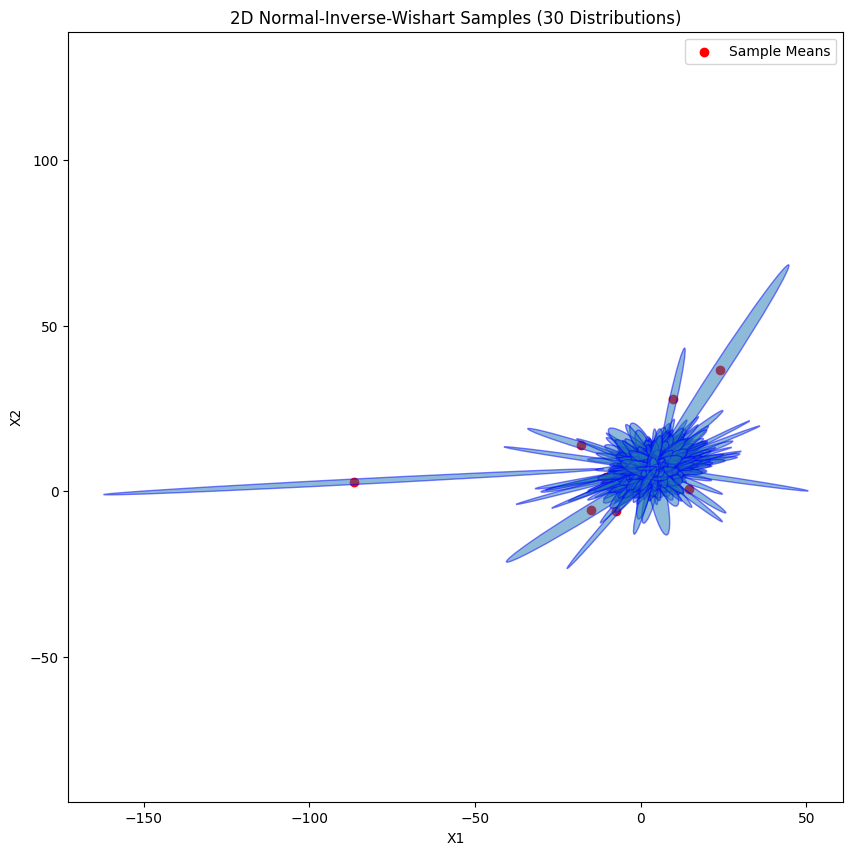

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invwishart, multivariate_normal

# 1. Normal-Inverse-Wishart 분포의 매개변수 설정
mu0 = np.array([4, 7])  # 평균 벡터의 사전 평균
kappa0 = 1.2            # 평균 벡터의 사전 정확도
Psi = np.array([[2, 0.5], [0.5, 1]])  # 스케일 행렬
nu = 4                  # 자유도 (nu > k-1, 여기서는 k=2)

# 2. 샘플링 (30개의 샘플)
N = 10000  # 샘플 수
samples_mu = []
samples_Sigma = []

for _ in range(N):
    # 공분산 행렬 샘플링 (Inverse Wishart)
    Sigma = invwishart.rvs(df=nu, scale=Psi)
    # 평균 벡터 샘플링 (Multivariate Normal)
    mu = multivariate_normal.rvs(mean=mu0, cov=Sigma / kappa0)
    samples_mu.append(mu)
    samples_Sigma.append(Sigma)

samples_mu = np.array(samples_mu)
samples_Sigma = np.array(samples_Sigma)

# 3. 2D 정규분포 타원 그리기 함수
def plot_cov_ellipse(cov, pos, ax=None, nstd=2.0, **kwargs):
    """
    Plots an ellipse representing the covariance matrix `cov` centered at `pos`.
    """
    from matplotlib.patches import Ellipse

    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:, order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
    width, height = 2 * nstd * np.sqrt(vals)
    ellipse = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_patch(ellipse)
    return ax

# 4. 플롯 생성
plt.figure(figsize=(10, 10))
ax = plt.gca()
ax.scatter(samples_mu[:, 0], samples_mu[:, 1], c='red', label='Sample Means')

for i in range(N):
    plot_cov_ellipse(samples_Sigma[i], samples_mu[i], ax=ax, edgecolor='blue', alpha=0.5)

plt.title("2D Normal-Inverse-Wishart Samples (30 Distributions)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis("equal")
plt.legend()
plt.show()


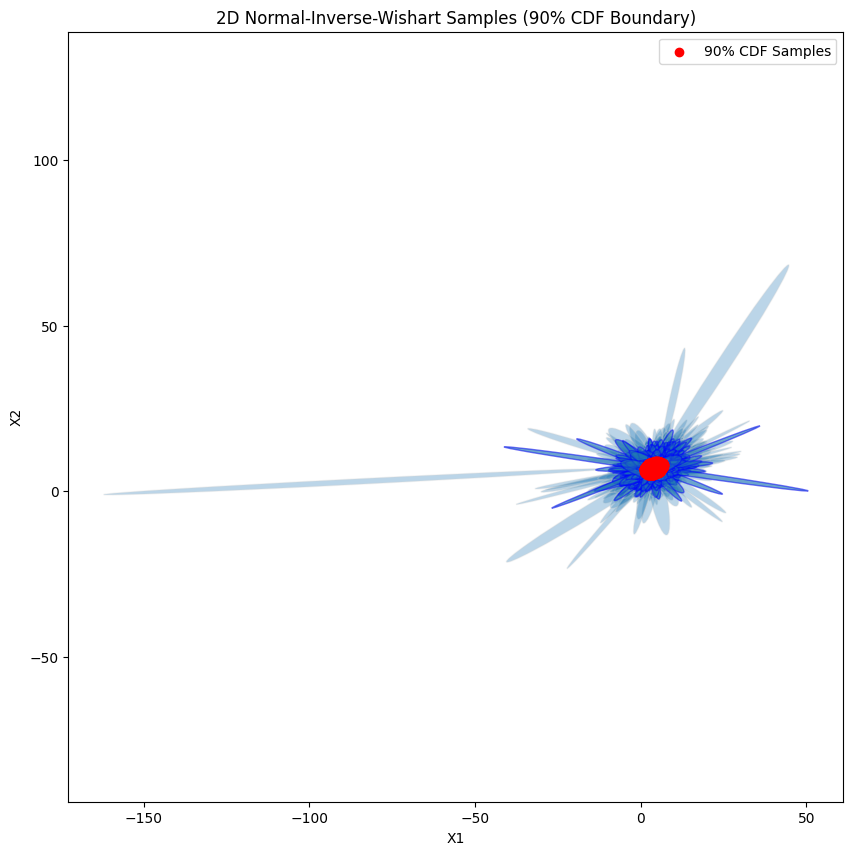

In [5]:
from scipy.stats import chi2

# 1. 마할라노비스 거리 계산 (모든 샘플의 중심에서)
inv_Psi = np.linalg.inv(Psi)
mahalanobis_distances = [
    (mu - mu0).T @ inv_Psi @ (mu - mu0) for mu in samples_mu
]

# 2. Chi-squared 임계값 (90% CDF, 자유도 2)
critical_value = chi2.ppf(0.9, df=2)

# 3. 90% CDF 내부에 있는 샘플 선택
inside_indices = [i for i, d in enumerate(mahalanobis_distances) if d <= critical_value]

# 4. 플롯 생성 (90% CDF 내부 샘플만 표시)
plt.figure(figsize=(10, 10))
ax = plt.gca()

# 모든 샘플 (배경)
for i in range(N):
    plot_cov_ellipse(samples_Sigma[i], samples_mu[i], ax=ax, edgecolor='lightgray', alpha=0.3)

# 90% CDF 내부 샘플
for i in inside_indices:
    plot_cov_ellipse(samples_Sigma[i], samples_mu[i], ax=ax, edgecolor='blue', alpha=0.5)
ax.scatter(samples_mu[inside_indices, 0], samples_mu[inside_indices, 1], c='red', label='90% CDF Samples')

plt.title("2D Normal-Inverse-Wishart Samples (90% CDF Boundary)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis("equal")
plt.legend()
plt.show()


In [6]:
from ipywidgets import interact, FloatSlider
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

# 함수 정의: 다변량 정규분포 시각화
def plot_multivariate_normal(a, b, theta):
    # 공분산 행렬 계산
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])
    scale_matrix = np.diag([a**2 / 4, b**2 / 4])  # 주축/보조축 길이에 따른 스케일링
    covariance_matrix = rotation_matrix @ scale_matrix @ rotation_matrix.T

    # 다변량 정규분포의 평균
    mean = [0, 0]

    # 그리드 생성
    x = np.linspace(-5, 5, 500)
    y = np.linspace(-5, 5, 500)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    # 다변량 정규분포 계산
    rv = multivariate_normal(mean, covariance_matrix)
    Z = rv.pdf(pos)

    # 등고선 그리기
    plt.figure(figsize=(8, 8))
    plt.contour(X, Y, Z, levels=10, linewidths=1.5, cmap='viridis')
    plt.title("2D Multivariate Normal Distribution")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.axis('equal')
    plt.grid(True)
    plt.show()

# Jupyter Lab 슬라이드바 생성
interact(
    plot_multivariate_normal,
    a=FloatSlider(min=1, max=5, step=0.1, value=3, description='Major Axis (a)'),
    b=FloatSlider(min=1, max=5, step=0.1, value=2, description='Minor Axis (b)'),
    theta=FloatSlider(min=0, max=np.pi, step=0.01, value=np.pi/4, description='Rotation (θ)'),
);


interactive(children=(FloatSlider(value=3.0, description='Major Axis (a)', max=5.0, min=1.0), FloatSlider(valu…

In [7]:
import numpy as np

def decompose_covariance(cov_matrix):
    # 고유값 분해
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # 고유값을 정렬 (큰 값을 첫 번째로)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # 주축과 보조축 길이
    a = 2 * np.sqrt(eigenvalues[0])  # 주축 길이
    b = 2 * np.sqrt(eigenvalues[1])  # 보조축 길이
    
    # 기울기 계산
    v1 = eigenvectors[:, 0]
    theta = np.arctan2(v1[1], v1[0])
    
    return a, b, theta

# 예제 공분산 행렬
cov_matrix = np.array([[4, 2],
                       [2, 3]])

# 분해 실행
a, b, theta = decompose_covariance(cov_matrix)
print(f"주축 길이 (a): {a}")
print(f"보조축 길이 (b): {b}")
print(f"기울기 (theta): {np.degrees(theta)}°")


주축 길이 (a): 4.716588942364527
보조축 길이 (b): 2.3987056402911717
기울기 (theta): -142.01812173396323°


In [18]:
import pandas as pd

In [19]:
def batch_decompose_covariances(cov_matrices):
    """
    여러 공분산 행렬을 numpy batch 연산으로 분해하여 주축 길이, 보조축 길이, 기울기를 반환하는 함수.
    
    Parameters:
        cov_matrices (np.ndarray): (N, 2, 2) 형태의 numpy 배열. N개의 2x2 공분산 행렬.
    
    Returns:
        pd.DataFrame: 각 공분산 행렬에 대한 주축 길이, 보조축 길이, 기울기를 포함한 데이터프레임.
    """
    # 고유값 및 고유벡터 계산 (batch 연산)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrices)
    
    # 고유값 정렬 (큰 값이 첫 번째)
    idx = np.argsort(eigenvalues, axis=1)[:, ::-1]
    eigenvalues_sorted = np.take_along_axis(eigenvalues, idx, axis=1)
    eigenvectors_sorted = np.take_along_axis(
        eigenvectors, idx[:, :, None], axis=1
    )  # 정렬된 고유벡터
    
    # 주축과 보조축 길이 계산
    a = 2 * np.sqrt(eigenvalues_sorted[:, 0])  # 주축 길이
    b = 2 * np.sqrt(eigenvalues_sorted[:, 1])  # 보조축 길이
    
    # 기울기 계산 (첫 번째 고유벡터 사용)
    v1 = eigenvectors_sorted[:, :, 0]
    theta = np.arctan2(v1[:, 1], v1[:, 0])  # 라디안 단위
    
    # 결과를 데이터프레임으로 정리
    results = {
        "Covariance Index": np.arange(1, cov_matrices.shape[0] + 1),
        "Major Axis (a)": a,
        "Minor Axis (b)": b,
        "Rotation (θ, rad)": theta,
        "Rotation (θ, deg)": np.degrees(theta),
    }
    
    return pd.DataFrame(results)

# 예제 공분산 행렬들 (numpy 배열로)
cov_matrices = np.array([
    [[4, 2],
     [2, 3]],
    [[1, 0.5],
     [0.5, 2]],
    [[9, -3],
     [-3, 4]]
])

# 함수 실행
res = batch_decompose_covariances(samples_Sigma)
# 결과 출력
# import ace_tools as tools; tools.display_dataframe_to_user(name="Batch Decomposed Covariances", dataframe=batch_results)


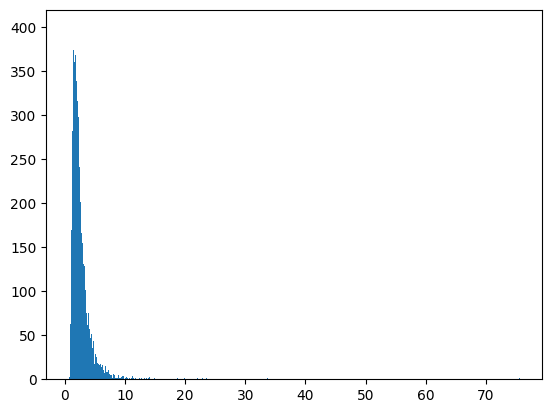

In [20]:
plt.hist(res['Major Axis (a)'], bins=1000)
plt.show()

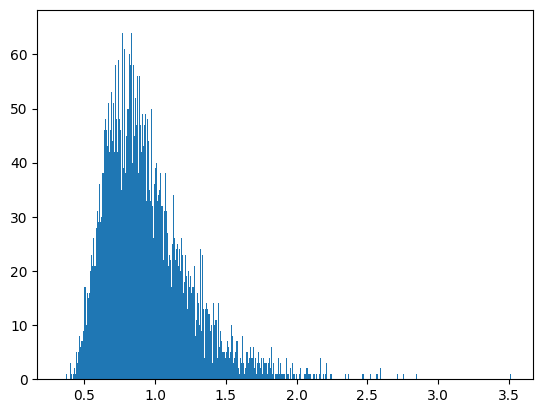

In [21]:
plt.hist(res['Minor Axis (b)'], bins=1000)
plt.show()

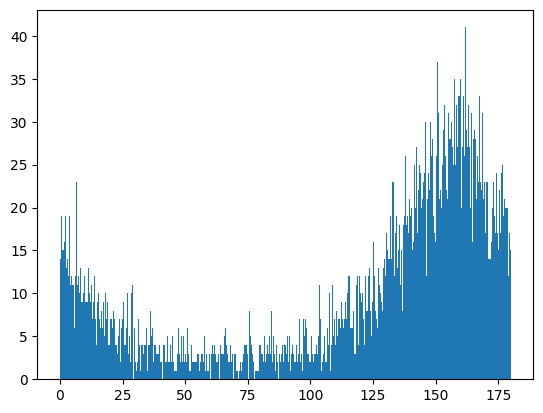

In [22]:
plt.hist([x if x<180 else x-180 for x in res['Rotation (θ, deg)'] + 180], bins=1000)
plt.show()

In [23]:
theta = 0
a = 10
b = 3
cos_theta = np.cos(theta)
sin_theta = np.sin(theta)
rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])
scale_matrix = np.diag([a**2 / 4, b**2 / 4])  # 주축/보조축 길이에 따른 스케일링
covariance_matrix = rotation_matrix @ scale_matrix @ rotation_matrix.T

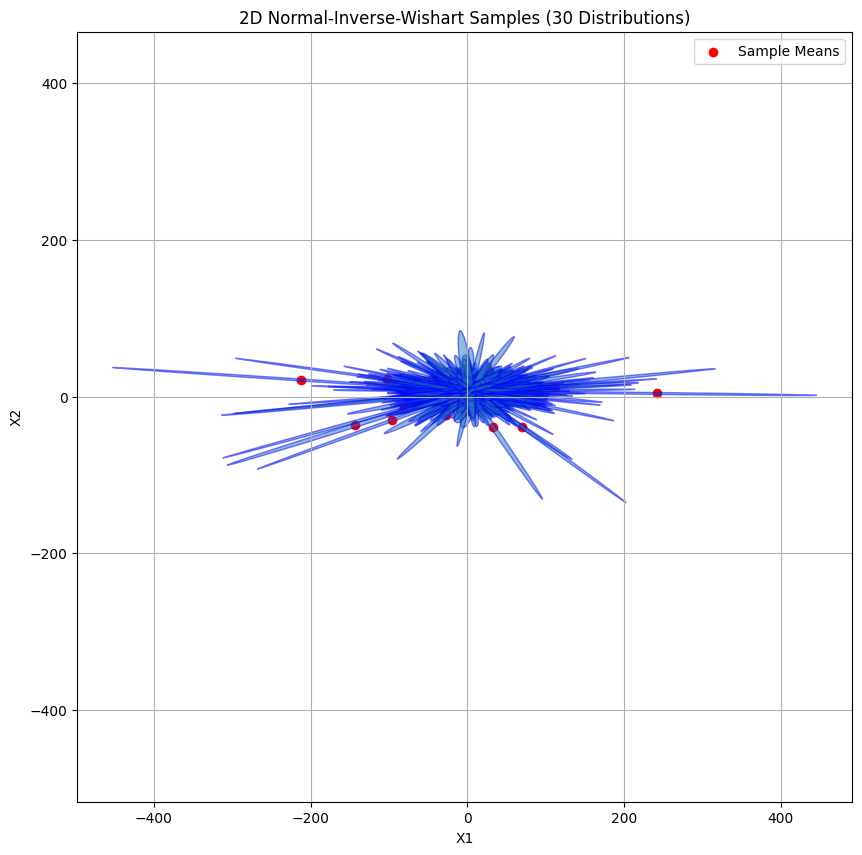

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invwishart, multivariate_normal

# 1. Normal-Inverse-Wishart 분포의 매개변수 설정
mu0 = np.array([4, 7])  # 평균 벡터의 사전 평균
kappa0 = 1.2            # 평균 벡터의 사전 정확도
Psi = np.array(covariance_matrix)  # 스케일 행렬
nu = 4                  # 자유도 (nu > k-1, 여기서는 k=2)

# 2. 샘플링 (30개의 샘플)
N = 100000  # 샘플 수
samples_mu = []
samples_Sigma = []

for _ in range(N):
    # 공분산 행렬 샘플링 (Inverse Wishart)
    Sigma = invwishart.rvs(df=nu, scale=Psi)
    # 평균 벡터 샘플링 (Multivariate Normal)
    mu = multivariate_normal.rvs(mean=mu0, cov=Sigma / kappa0)
    samples_mu.append(mu)
    samples_Sigma.append(Sigma)

samples_mu = np.array(samples_mu)
samples_Sigma = np.array(samples_Sigma)

# 3. 2D 정규분포 타원 그리기 함수
def plot_cov_ellipse(cov, pos, ax=None, nstd=2.0, **kwargs):
    """
    Plots an ellipse representing the covariance matrix `cov` centered at `pos`.
    """
    from matplotlib.patches import Ellipse

    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:, order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
    width, height = 2 * nstd * np.sqrt(vals)
    ellipse = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_patch(ellipse)
    return ax

# 4. 플롯 생성
plt.figure(figsize=(10, 10))
plt.grid(True)

ax = plt.gca()
ax.scatter(samples_mu[:, 0], samples_mu[:, 1], c='red', label='Sample Means')

for i in range(N):
    plot_cov_ellipse(samples_Sigma[i], samples_mu[i], ax=ax, edgecolor='blue', alpha=0.5)

plt.title("2D Normal-Inverse-Wishart Samples (30 Distributions)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis("equal")
plt.legend()
plt.show()


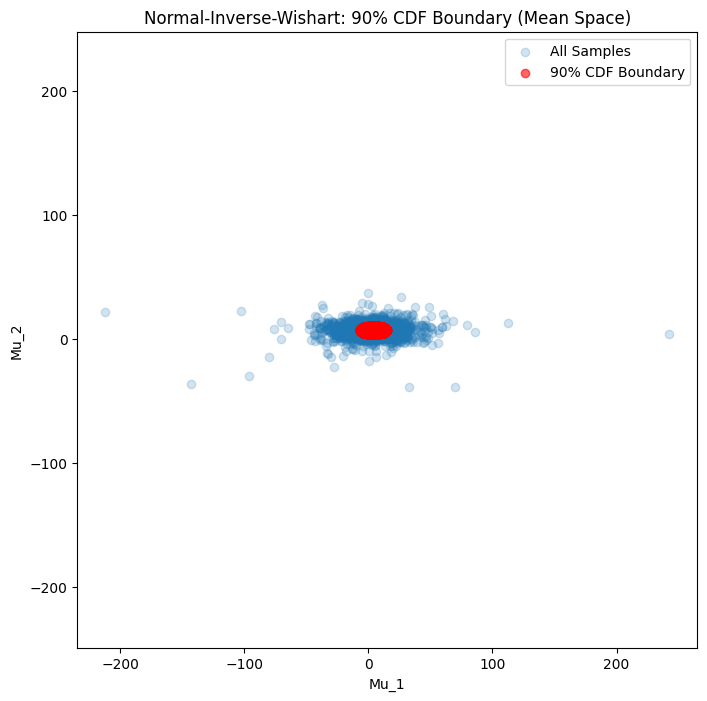

In [25]:
# 3. 마할라노비스 거리 기반 경계 계산
# 기준점을 평균으로 설정
mean_mu = np.mean(samples_mu, axis=0)
mean_Sigma = np.mean(samples_Sigma, axis=0)

inv_mean_Sigma = np.linalg.inv(mean_Sigma)
mahalanobis_distances = [
    (mu - mean_mu).T @ inv_mean_Sigma @ (mu - mean_mu)
    for mu in samples_mu
]

# Chi-squared 임계값 (90% CDF, 자유도 2)
from scipy.stats import chi2
critical_value = chi2.ppf(0.9, df=2)

# 4. 90% CDF 경계에 해당하는 샘플 추출
boundary_mu = samples_mu[np.array(mahalanobis_distances) <= critical_value]

plt.figure(figsize=(8, 8))
plt.scatter(samples_mu[:, 0], samples_mu[:, 1], alpha=0.2, label="All Samples")
plt.scatter(boundary_mu[:, 0], boundary_mu[:, 1], color="red", alpha=0.6, label="90% CDF Boundary")
plt.title("Normal-Inverse-Wishart: 90% CDF Boundary (Mean Space)")
plt.xlabel("Mu_1")
plt.ylabel("Mu_2")
plt.legend()
plt.axis("equal")
plt.show()

In [26]:
theta = 0
a = 10
b = 3
cos_theta = np.cos(theta)
sin_theta = np.sin(theta)
rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])
scale_matrix = np.diag([a**2 / 4, b**2 / 4])  # 주축/보조축 길이에 따른 스케일링
covariance_matrix = rotation_matrix @ scale_matrix @ rotation_matrix.T

batch_decompose_covariances(np.array([covariance_matrix / 7]))

,Covariance Index,Major Axis (a),Minor Axis (b),"Rotation (θ, rad)","Rotation (θ, deg)"
0,1,3.779645,1.133893,0.0,0.0


In [27]:
def batch_decompose_covariances(cov_matrices):
    """
    여러 공분산 행렬을 numpy batch 연산으로 분해하여 주축 길이, 보조축 길이, 기울기를 반환하는 함수.
    
    Parameters:
        cov_matrices (np.ndarray): (N, 2, 2) 형태의 numpy 배열. N개의 2x2 공분산 행렬.
    
    Returns:
        pd.DataFrame: 각 공분산 행렬에 대한 주축 길이, 보조축 길이, 기울기를 포함한 데이터프레임.
    """
    # 고유값 및 고유벡터 계산 (batch 연산)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrices)
    
    # 고유값 정렬 (큰 값이 첫 번째)
    idx = np.argsort(eigenvalues, axis=1)[:, ::-1]
    eigenvalues_sorted = np.take_along_axis(eigenvalues, idx, axis=1)
    eigenvectors_sorted = np.take_along_axis(
        eigenvectors, idx[:, :, None], axis=1
    )  # 정렬된 고유벡터
    
    # 주축과 보조축 길이 계산
    a = 2 * np.sqrt(eigenvalues_sorted[:, 0])  # 주축 길이
    b = 2 * np.sqrt(eigenvalues_sorted[:, 1])  # 보조축 길이
    
    # 기울기 계산 (첫 번째 고유벡터 사용)
    v1 = eigenvectors_sorted[:, :, 0]
    theta = np.arctan2(v1[:, 1], v1[:, 0])  # 라디안 단위
    
    # 결과를 데이터프레임으로 정리
    results = {
        "Covariance Index": np.arange(1, cov_matrices.shape[0] + 1),
        "Major Axis (a)": a,
        "Minor Axis (b)": b,
        "Rotation (θ, rad)": theta,
        "Rotation (θ, deg)": np.degrees(theta),
    }
    
    return pd.DataFrame(results)

# 예제 공분산 행렬들 (numpy 배열로)
cov_matrices = np.array([
    [[4, 2],
     [2, 3]],
    [[1, 0.5],
     [0.5, 2]],
    [[9, -3],
     [-3, 4]]
])

# 함수 실행
res = batch_decompose_covariances(samples_Sigma)
# 결과 출력
# import ace_tools as tools; tools.display_dataframe_to_user(name="Batch Decomposed Covariances", dataframe=batch_results)


5.422815188928027
1.4061908242442023
179.00998656740842


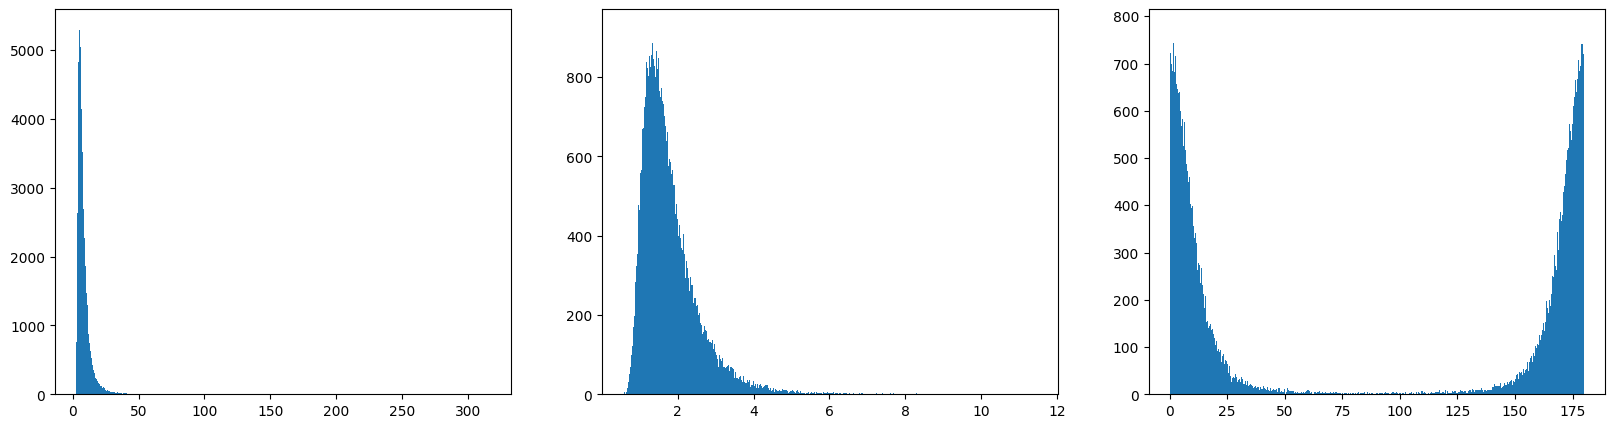

In [28]:
fig, ax = plt.subplots(1,3, figsize=(20,5))


hist, bin_edges = np.histogram(res['Major Axis (a)'], bins=1000)
max_bin_index = np.argmax(hist)
mode = (bin_edges[max_bin_index] + bin_edges[max_bin_index + 1]) / 2

print(mode)
hist, bin_edges = np.histogram(res['Minor Axis (b)'], bins=1000)
max_bin_index = np.argmax(hist)
mode = (bin_edges[max_bin_index] + bin_edges[max_bin_index + 1]) / 2

print(mode)
hist, bin_edges = np.histogram([x if x<180 else x-180 for x in res['Rotation (θ, deg)'] + 180], bins=1000)
max_bin_index = np.argmax(hist)
mode = (bin_edges[max_bin_index] + bin_edges[max_bin_index + 1]) / 2

print(mode)
ax[0].hist(res['Major Axis (a)'], bins=1000)
ax[1].hist(res['Minor Axis (b)'], bins=1000)
ax[2].hist([x if x<180 else x-180 for x in res['Rotation (θ, deg)'] + 180], bins=1000)
plt.show()

In [29]:
def plot_2d_gaussian_1sigma(mean, cov):
    """
    2차원 정규분포의 1 시그마 영역을 선으로 시각화하는 함수.
    
    Parameters:
    - mean: 평균 벡터 (리스트 또는 1차원 배열)
    - cov: 공분산 행렬 (2x2 행렬)
    """
    cov = np.array(cov)  # 공분산 행렬을 numpy 배열로 변환
    
    # 1시그마 영역 계산
    theta = np.linspace(0, 2 * np.pi, 100)  # 각도
    circle = np.array([np.cos(theta), np.sin(theta)])  # 단위 원
    ellipse = np.linalg.cholesky(cov) @ circle  # 공분산 변환
    ellipse = ellipse.T + mean  # 평균 추가
    
    # 플롯
    plt.plot(ellipse[:, 0], ellipse[:, 1], label="1σ Contour")
    plt.scatter(mean[0], mean[1], color='red', label="Mean")
    plt.title("1 Sigma Contour of 2D Gaussian")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid(alpha=0.3)

# 평균과 공분산 설정
mean = [0, 0]  # 평균
cov = [[2, 0.5], [0.5, 1]]  # 공분산 행렬
plt.figure(figsize=(8, 6))

# 함수 호출
for cov in Sigma[:1000]:
    plot_2d_gaussian_1sigma(mean, cov)
plt.show()

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

<Figure size 800x600 with 0 Axes>

In [30]:
theta = np.pi / 3
a = 8
b = 3
cos_theta = np.cos(theta)
sin_theta = np.sin(theta)
rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])
scale_matrix = np.diag([a**2 / 4, b**2 / 4])  # 주축/보조축 길이에 따른 스케일링
covariance_matrix = rotation_matrix @ scale_matrix @ rotation_matrix.T


In [31]:
batch_decompose_covariances(np.array([covariance_matrix]))

,Covariance Index,Major Axis (a),Minor Axis (b),"Rotation (θ, rad)","Rotation (θ, deg)"
0,1,8.0,3.0,-1.047198,-60.0


12.922531630781407
0.9670161747694271
120.04680935742391


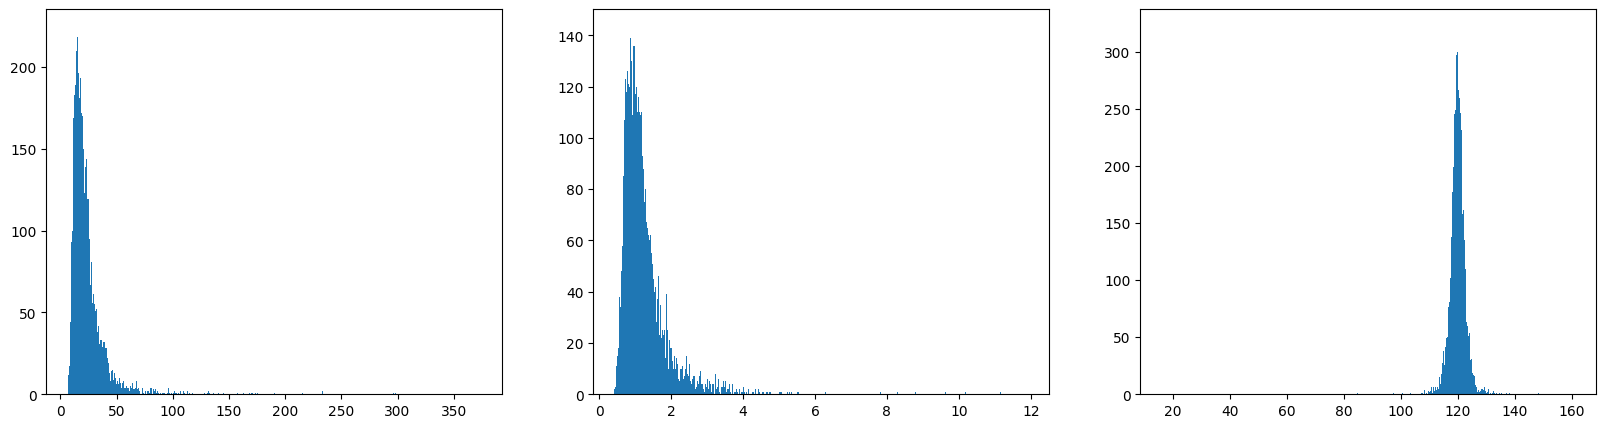

In [32]:
theta = np.pi / 3
a = 30
b = 2
cos_theta = np.cos(theta)
sin_theta = np.sin(theta)
rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])
scale_matrix = np.diag([a**2 / 4, b**2 / 4])  # 주축/보조축 길이에 따른 스케일링
covariance_matrix = rotation_matrix @ scale_matrix @ rotation_matrix.T

nu = 4

dist = invwishart(df=nu, scale=covariance_matrix)
Sigma = dist.rvs(10000)
res = batch_decompose_covariances(Sigma)

fig, ax = plt.subplots(1,3, figsize=(20,5))


hist, bin_edges = np.histogram(res['Major Axis (a)'], bins=1000)
max_bin_index = np.argmax(hist)
mode = (bin_edges[max_bin_index] + bin_edges[max_bin_index + 1]) / 2

print(mode)
hist, bin_edges = np.histogram(res['Minor Axis (b)'], bins=1000)
max_bin_index = np.argmax(hist)
mode = (bin_edges[max_bin_index] + bin_edges[max_bin_index + 1]) / 2

print(mode)
hist, bin_edges = np.histogram([x if x<180 else x-180 for x in res['Rotation (θ, deg)'] + 180], bins=1000)
max_bin_index = np.argmax(hist)
mode = (bin_edges[max_bin_index] + bin_edges[max_bin_index + 1]) / 2

print(mode)
ax[0].hist(res['Major Axis (a)'], bins=1000)
ax[1].hist(res['Minor Axis (b)'], bins=1000)
ax[2].hist([x if x<180 else x-180 for x in res['Rotation (θ, deg)'] + 180], bins=1000)
plt.show()

90% 확률을 포함하는 (mu, Sigma):
mu: [0.26315789 0.26315789], Sigma:
[[0.64444444 0.22222222]
 [0.22222222 0.64444444]]
mu: [-0.26315789  0.26315789], Sigma:
[[ 0.64444444 -0.22222222]
 [-0.22222222  0.64444444]]
mu: [ 0.26315789 -0.26315789], Sigma:
[[ 0.64444444 -0.22222222]
 [-0.22222222  0.64444444]]
mu: [-0.26315789 -0.26315789], Sigma:
[[0.64444444 0.22222222]
 [0.22222222 0.64444444]]
mu: [0.26315789 0.26315789], Sigma:
[[ 0.64444444 -0.22222222]
 [-0.22222222  0.64444444]]
mu: [-0.26315789  0.26315789], Sigma:
[[0.64444444 0.22222222]
 [0.22222222 0.64444444]]
mu: [ 0.26315789 -0.26315789], Sigma:
[[0.64444444 0.22222222]
 [0.22222222 0.64444444]]
mu: [-0.26315789 -0.26315789], Sigma:
[[ 0.64444444 -0.22222222]
 [-0.22222222  0.64444444]]
mu: [0.26315789 0.78947368], Sigma:
[[0.1        0.22222222]
 [0.22222222 1.18888889]]
mu: [0.78947368 0.26315789], Sigma:
[[1.18888889 0.22222222]
 [0.22222222 0.1       ]]
mu: [ 0.26315789 -0.78947368], Sigma:
[[ 0.1        -0.22222222]
 [-0.222222

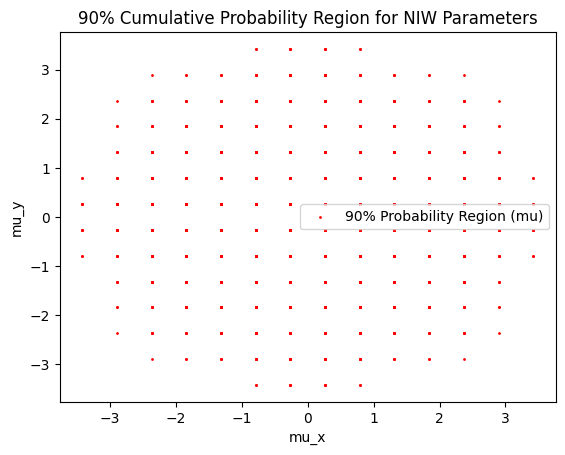

In [33]:
import numpy as np
from scipy.stats import invwishart, multivariate_normal

# NIW 파라미터 설정
mu_0 = np.array([0, 0])   # Prior mean
kappa_0 = 1               # Scale parameter
nu_0 = 5                  # Degrees of freedom (must be > dimension)
Psi_0 = np.eye(2)         # Scale matrix

# Grid 설정
mu_x = np.linspace(-5, 5, 20)
mu_y = np.linspace(-5, 5, 20)
sigma_11 = np.linspace(0.1, 5, 10)
sigma_22 = np.linspace(0.1, 5, 10)
sigma_12 = np.linspace(-2, 2, 10)

# Grid 생성
mu_grid = np.array(np.meshgrid(mu_x, mu_y)).T.reshape(-1, 2)
sigma_grid = np.array(np.meshgrid(sigma_11, sigma_22, sigma_12)).T.reshape(-1, 3)

# 유효한 공분산 행렬 필터링
valid_indices = sigma_grid[:, 0] * sigma_grid[:, 1] - sigma_grid[:, 2] ** 2 > 0
valid_sigma_grid = sigma_grid[valid_indices]

# 결합 확률 밀도 계산
densities = []

for mu in mu_grid:
    for sigma_params in valid_sigma_grid:
        sigma = np.array([
            [sigma_params[0], sigma_params[2]],
            [sigma_params[2], sigma_params[1]]
        ])
        # Inverse-Wishart 밀도 계산
        iw_density = invwishart.pdf(sigma, df=nu_0, scale=Psi_0)
        # 다변량 정규분포 밀도 계산
        mvn_density = multivariate_normal.pdf(mu, mean=mu_0, cov=sigma / kappa_0)
        # 결합 확률 밀도
        densities.append(iw_density * mvn_density)

# 확률 밀도 배열로 변환 및 정규화
densities = np.array(densities)
densities /= densities.sum()

# 누적 확률 계산
sorted_indices = np.argsort(-densities)
sorted_densities = densities[sorted_indices]
cumulative_prob = np.cumsum(sorted_densities)

# 90% 확률 영역 선택
threshold_index = np.searchsorted(cumulative_prob, 0.9)
selected_indices = sorted_indices[:threshold_index]

# 결과 정리
mu_selected = mu_grid[selected_indices // len(valid_sigma_grid)]
sigma_selected = valid_sigma_grid[selected_indices % len(valid_sigma_grid)]

# 출력
print(f"90% 확률을 포함하는 (mu, Sigma):")
for mu, sigma_params in zip(mu_selected, sigma_selected):
    sigma_matrix = np.array([
        [sigma_params[0], sigma_params[2]],
        [sigma_params[2], sigma_params[1]]
    ])
    print(f"mu: {mu}, Sigma:\n{sigma_matrix}")

# 시각화
import matplotlib.pyplot as plt

plt.scatter(mu_selected[:, 0], mu_selected[:, 1], color='red', s=1, label="90% Probability Region (mu)")
plt.title("90% Cumulative Probability Region for NIW Parameters")
plt.xlabel("mu_x")
plt.ylabel("mu_y")
plt.legend()
plt.show()


In [ ]:
grid_points[10]

In [ ]:
Psi_0

In [34]:
a = 12
b = 2
theta = 30

cos_theta = np.cos(theta)
sin_theta = np.sin(theta)
rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])
scale_matrix = np.diag([a**2 / 4, b**2 / 4])  # 주축/보조축 길이에 따른 스케일링
covariance_matrix = rotation_matrix @ scale_matrix @ rotation_matrix.T

nu_0 = 4
Psi_0 = np.eye(2)
iw_density = invwishart.pdf(covariance_matrix, df=nu_0, scale=Psi_0)
iw_density

8.50202306596798e-08

In [35]:
np.sin(np.pi/2)

1.0

In [36]:
theta = 30 * np.pi / 180
a = 15
b = 6
nu_0 = 6
# 공분산 행렬 계산
cos_theta = np.cos(theta)
sin_theta = np.sin(theta)
rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])
scale_matrix = np.diag([a**2 / 4, b**2 / 4])  # 주축/보조축 길이에 따른 스케일링
shape_Sigma = rotation_matrix @ scale_matrix @ rotation_matrix.T

In [37]:
shape_Sigma

array([[44.4375    , 20.45985016],
       [20.45985016, 20.8125    ]])

In [38]:
120 * np.pi / 180

2.0943951023931953

In [39]:
from ipywidgets import interact, FloatSlider
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

# 함수 정의: 다변량 정규분포 시각화
def plot_multivariate_normal(a, b, theta):
    # 공분산 행렬 계산
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])
    scale_matrix = np.diag([a**2 / 4, b**2 / 4])  # 주축/보조축 길이에 따른 스케일링
    covariance_matrix = rotation_matrix @ scale_matrix @ rotation_matrix.T

    # 다변량 정규분포의 평균
    mean = [0, 0]

    # 그리드 생성
    x = np.linspace(-20, 20, 500)
    y = np.linspace(-20, 20, 500)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    # 다변량 정규분포 계산
    rv = multivariate_normal(mean, covariance_matrix)
    Z = rv.pdf(pos)

    
    # covariance probability
    iw_density = invwishart.pdf(covariance_matrix, df=nu_0, scale=shape_Sigma)
    shape_dist = multivariate_normal(mean, shape_Sigma)
    Z_base = shape_dist.pdf(pos)
    print(iw_density)
    
    # 등고선 그리기
    plt.figure(figsize=(8, 8))
    
    plt.contourf(X, Y, Z_base, levels=10, cmap='bone')
    plt.contour(X, Y, Z, levels=10, linewidths=1.5, cmap='cool')
    plt.title("2D Multivariate Normal Distribution")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.axis('equal')
    plt.grid(True)
    plt.show()

# Jupyter Lab 슬라이드바 생성
interact(
    plot_multivariate_normal,
    a=FloatSlider(min=1, max=20, step=0.1, value=3, description='Major Axis (a)'),
    b=FloatSlider(min=1, max=20, step=0.1, value=2, description='Minor Axis (b)'),
    theta=FloatSlider(min=0, max=np.pi, step=0.01, value=np.pi/4, description='Rotation (θ)'),
);


interactive(children=(FloatSlider(value=3.0, description='Major Axis (a)', max=20.0, min=1.0), FloatSlider(val…

In [ ]:
np.arctan(np.sqrt(3)) * 180 / np.pi

In [ ]:
14 / 5.3

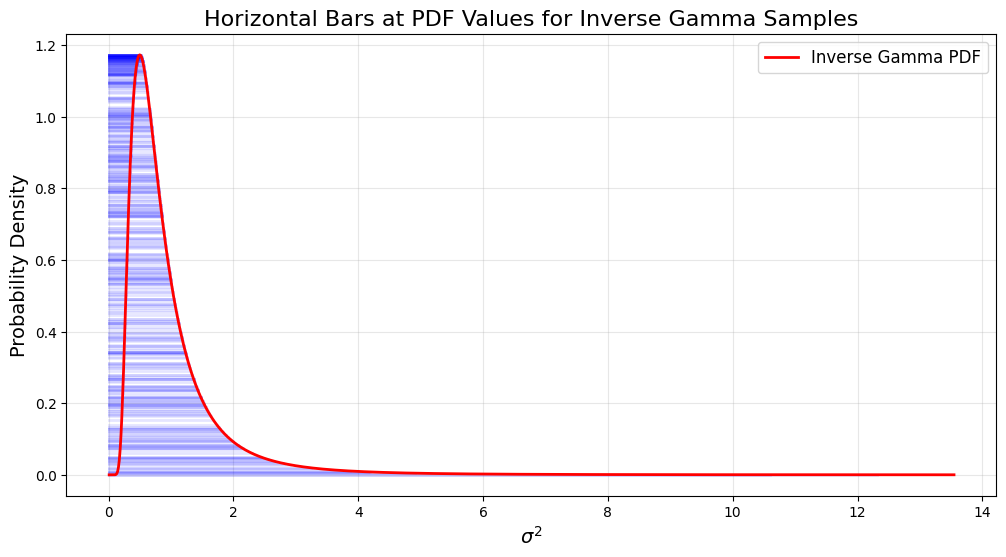

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgamma

# Inverse Gamma 분포의 매개변수 설정
alpha = 3.0  # shape parameter (α)
beta = 2.0   # scale parameter (β)

# Inverse Gamma에서 sigma^2 샘플링
num_samples = 500
samples = invgamma.rvs(alpha, scale=beta, size=num_samples)

# PDF 계산
pdf_values = invgamma.pdf(samples, alpha, scale=beta)

# 시각화
plt.figure(figsize=(12, 6))

# x축에 평행한 막대(bar) 추가
for sample, pdf in zip(samples, pdf_values):
    plt.plot([0, sample], [pdf, pdf], 'b-', lw=2, alpha=0.1)  # x축 방향으로 평행한 선(bar)

# PDF 곡선 그리기
x = np.linspace(0.01, np.max(samples) * 1.1, 1000)
pdf_curve = invgamma.pdf(x, alpha, scale=beta)
plt.plot(x, pdf_curve, 'r-', lw=2, label="Inverse Gamma PDF")

# 그래프 설정
plt.title("Horizontal Bars at PDF Values for Inverse Gamma Samples", fontsize=16)
plt.xlabel("$\sigma^2$", fontsize=14)
plt.ylabel("Probability Density", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


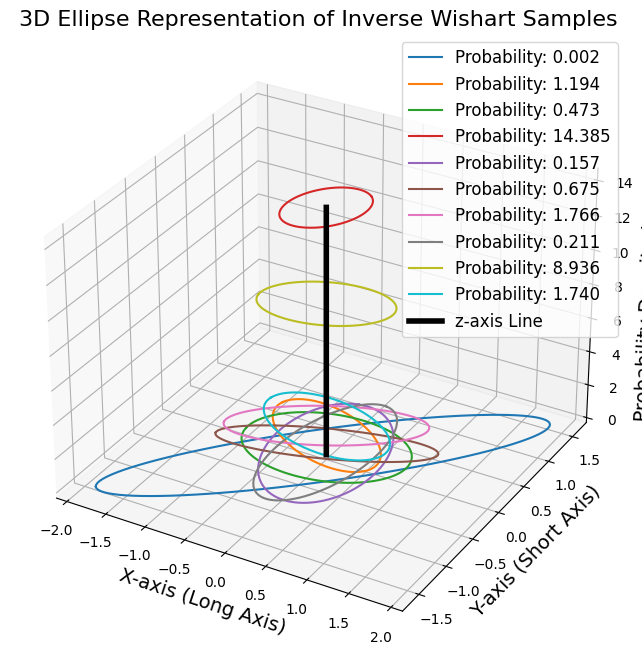

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from mpl_toolkits.mplot3d.art3d import Patch3DCollection
from scipy.stats import invwishart

# Inverse Wishart 분포 매개변수 설정
df = 5  # 자유도
scale_matrix = np.array([[2, 0.5], [0.5, 1]])  # 스케일 행렬

# Inverse Wishart에서 샘플 생성
num_samples = 10  # 표시할 타원 수
samples = invwishart.rvs(df, scale_matrix, size=num_samples if num_samples > 1 else None)

# 각 샘플의 고유값, 고유벡터, 확률 계산
ellipses = []
probabilities = []

for sample in (samples if num_samples > 1 else [samples]):
    # 고유값과 고유벡터 계산
    eigenvalues, eigenvectors = np.linalg.eigh(sample)
    long_axis = np.sqrt(eigenvalues[1])  # 장축 길이
    short_axis = np.sqrt(eigenvalues[0])  # 단축 길이
    angle = np.arctan2(eigenvectors[1, 1], eigenvectors[0, 1]) * 180 / np.pi  # 회전각도

    # 확률 밀도 계산
    prob = invwishart.pdf(sample, df, scale_matrix)
    probabilities.append(prob)

    # 타원 정보 저장
    ellipses.append((long_axis, short_axis, angle, prob))

# 3D 시각화
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 타원을 3D로 추가
for (long_axis, short_axis, angle, prob) in ellipses:
    # 타원의 점 생성 (xy 평면)
    theta = np.linspace(0, 2 * np.pi, 100)
    x = long_axis * np.cos(theta)
    y = short_axis * np.sin(theta)

    # 회전 적용
    rotation_matrix = np.array([[np.cos(np.radians(angle)), -np.sin(np.radians(angle))],
                                 [np.sin(np.radians(angle)), np.cos(np.radians(angle))]])
    points = np.dot(rotation_matrix, np.array([x, y]))
    x_rot, y_rot = points

    # 타원 그리기 (xy 평면, z = prob)
    ax.plot(x_rot, y_rot, zs=prob, zdir='z', label=f"Probability: {prob:.3f}")

# 원점에서 z축으로 향하는 직선 추가
max_z = max(probabilities)
ax.plot([0, 0], [0, 0], [0, max_z], 'k-', lw=4, label="z-axis Line")

# z축 확률 표시
ax.set_title("3D Ellipse Representation of Inverse Wishart Samples", fontsize=16)
ax.set_xlabel("X-axis (Long Axis)", fontsize=14)
ax.set_ylabel("Y-axis (Short Axis)", fontsize=14)
ax.set_zlabel("Probability Density (z-axis)", fontsize=14)
ax.legend(fontsize=12)

plt.show()


In [42]:
theta = 30 * np.pi / 180
a = 15
b = 6
nu_0 = 6
# 공분산 행렬 계산
cos_theta = np.cos(theta)
sin_theta = np.sin(theta)
rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])
scale_matrix = np.diag([a**2 / 4, b**2 / 4])  # 주축/보조축 길이에 따른 스케일링
shape_Sigma = rotation_matrix @ scale_matrix @ rotation_matrix.T

In [94]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import invwishart
import plotly.io as pio

# Jupyter Lab에서 Plotly를 사용할 수 있도록 설정
pio.renderers.default = "browser"

# Inverse Wishart 분포 매개변수 설정
df = 5  # 자유도
scale_matrix = shape_Sigma

# Inverse Wishart에서 샘플 생성
num_samples = 10000  # 표시할 타원 수
samples = invwishart.rvs(df, shape_Sigma, size=num_samples if num_samples > 1 else None)

# 각 샘플의 고유값, 고유벡터, 확률 계산
ellipses = []
probabilities = []

for sample in (samples if num_samples > 1 else [samples]):
    # 고유값과 고유벡터 계산
    eigenvalues, eigenvectors = np.linalg.eigh(sample)
    long_axis = np.sqrt(eigenvalues[1])  # 장축 길이
    short_axis = np.sqrt(eigenvalues[0])  # 단축 길이
    angle = np.arctan2(eigenvectors[1, 1], eigenvectors[0, 1])  # 회전 각도 (라디안)

    # 확률 밀도 계산
    prob = invwishart.pdf(sample, df, shape_Sigma)
    probabilities.append(prob)

    # 타원 정보 저장
    ellipses.append((long_axis, short_axis, angle, prob))

# Plotly 시각화 데이터 생성
fig = go.Figure()

# 타원을 추가
for (long_axis, short_axis, angle, prob) in ellipses:
    theta = np.linspace(0, 2 * np.pi, 100)
    x = long_axis * np.cos(theta)
    y = short_axis * np.sin(theta)

    # 회전 적용
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                 [np.sin(angle),  np.cos(angle)]])
    points = np.dot(rotation_matrix, np.array([x, y]))
    x_rot, y_rot = points

    # 타원 추가 (xy 평면, z = prob, 투명도 0.5 설정)
    fig.add_trace(go.Scatter3d(
        x=x_rot, y=y_rot, z=[prob] * len(x_rot),
        mode='lines',
        line=dict(color='blue', width=2),
        opacity=0.1,
        name=f"Probability: {prob:.3f}"
    ))

# 원점에서 z축으로 향하는 직선 추가
max_z = max(probabilities)
fig.add_trace(go.Scatter3d(
    x=[0, 0], y=[0, 0], z=[0, max_z],
    mode='lines',
    line=dict(color='black', width=5),
    name="z-axis Line"
))

# 그래프 레이아웃 설정
fig.update_layout(
    title="Interactive 3D Visualization of Inverse Wishart Samples with Transparency",
    scene=dict(
        xaxis_title="X-axis (Long Axis)",
        yaxis_title="Y-axis (Short Axis)",
        zaxis_title="Probability Density",
    ),
    showlegend=True
)

# 그래프 출력
fig.show()


/usr/bin/xdg-open: 869: x-www-browser: not found
/usr/bin/xdg-open: 869: firefox: not found
/usr/bin/xdg-open: 869: iceweasel: not found
/usr/bin/xdg-open: 869: seamonkey: not found
/usr/bin/xdg-open: 869: mozilla: not found
/usr/bin/xdg-open: 869: epiphany: not found
/usr/bin/xdg-open: 869: konqueror: not found
/usr/bin/xdg-open: 869: chromium: not found
/usr/bin/xdg-open: 869: chromium-browser: not found
/usr/bin/xdg-open: 869: google-chrome: not found
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'http://127.0.0.1:40795'
Exception ignored in: <function Widget.__del__ at 0x78ae6e0cd310>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/ipywidgets/widgets/widget.py", line 514, in __del__
    def __del__(self):


In [555]:
np.__version__

'1.24.4'

In [560]:
from scipy.special import kl_div
def frobenius_norm(cov1, cov2):
    return np.linalg.norm(cov1 - cov2, ord='fro')

from numpy.linalg import slogdet, inv

def kl_divergence(cov1, cov2):
    dim = cov1.shape[0]
    cov2_inv = inv(cov2)
    term1 = np.trace(np.dot(cov2_inv, cov1))
    term2 = slogdet(cov2)[1] - slogdet(cov1)[1]
    return 0.5 * (term1 - dim + term2)

from scipy.linalg import sqrtm

def wasserstein_distance(cov1, cov2):
    cov1_sqrt = sqrtm(cov1)
    term = sqrtm(np.dot(np.dot(cov1_sqrt, cov2), cov1_sqrt))
    return np.trace(cov1 + cov2 - 2 * term).real  # Ensure the result is real
def bures_distance(cov1, cov2):
    cov1_sqrt = sqrtm(cov1)
    term = sqrtm(np.dot(np.dot(cov1_sqrt, cov2), cov1_sqrt))
    return np.sqrt(np.trace(cov1 + cov2 - 2 * term).real)
def log_euclidean_distance(cov1, cov2):
    log_cov1 = np.linalg.logm(cov1)
    log_cov2 = np.linalg.logm(cov2)
    return np.linalg.norm(log_cov1 - log_cov2, ord='fro')
def bhattacharyya_distance(cov1, cov2, mean1, mean2):
    cov_avg = (cov1 + cov2) / 2
    mean_diff = mean2 - mean1
    term1 = 1/8 * np.dot(np.dot(mean_diff.T, inv(cov_avg)), mean_diff)
    term2 = 0.5 * (slogdet(cov_avg)[1] - 0.5 * (slogdet(cov1)[1] + slogdet(cov2)[1]))
    return term1 + term2

def affine_invariant_metric(cov1, cov2):
    cov1_inv_sqrt = sqrtm(inv(cov1))
    term = np.dot(cov1_inv_sqrt, np.dot(cov2, cov1_inv_sqrt))
    log_term = term#np.linalg.det(term)
    return np.linalg.norm(log_term, ord='fro')


In [561]:
cov = np.array([[1, 0], [0, 1]])
df = 4
num_samples = 10000
samples = invwishart.rvs(df, cov, size=num_samples)
data = list()
for sample in samples:
    prob = invwishart.pdf(sample, df, cov)
    #dist = np.trace(sample)#wasserstein_distance_covariance(cov, sample)
    dist = affine_invariant_metric(cov, sample)#np.linalg.det(sample)
    data.append([dist, prob])
data = np.array(data)

(0.0, 5.0)

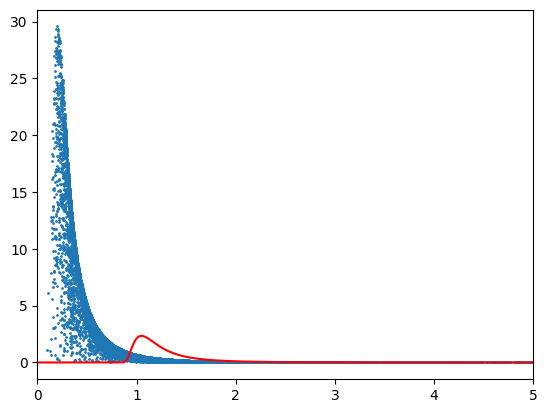

In [562]:
plt.scatter(data[:,0], data[:,1], s=1)
l = np.linspace(0, 5, 1000)
plt.plot(l, invgamma(3,0.8).pdf(l), color='r')
plt.xlim(0, 5)

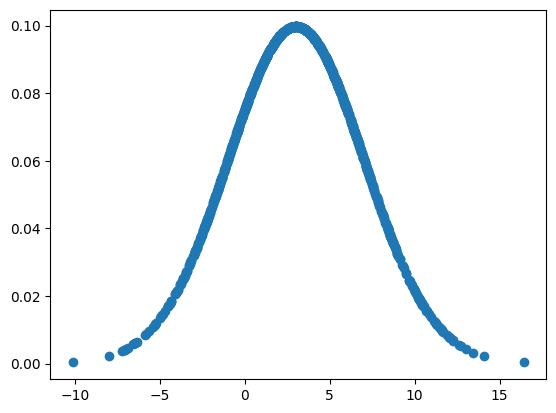

In [502]:
from scipy.stats import norm
samples = norm(3,4).rvs(1000)
prob = norm(3,4).pdf(samples)
plt.scatter(samples, prob)
plt.show()

In [526]:
from scipy.spatial.distance import mahalanobis

cov = np.array([[3, 1], [1, 7]])
dist = multivariate_normal([3,5], cov)
samples = dist.rvs(100000)
prob = dist.pdf(samples)
inv_cov = np.linalg.inv(cov)
#dist = [mahalanobis(x, [3,5], inv_cov) for x in samples]
dist = [np.linalg.det(x) for x in samples]
plt.scatter(dist, prob, s=1)
plt.xlim(-10, 10)
plt.grid(True)
plt.show()

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

In [566]:
invwishart.rvs(df=nu, scale=scale_matrix)

0.1133755854138673

In [591]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invwishart

# Parameters for the inverse Wishart distribution
df = 4  # degrees of freedom
s = 10

def plot_q(s, r, r2):
    scale_matrix = np.array([[s, r], [r, s]])  # scale matrix

    # Create a grid of values
    x = np.linspace(0, 4, 100)
    y = np.linspace(0, 4, 100)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    
    # Define the density function for the 2D inverse Wishart
    def invwishart_pdf(pos, df, scale_matrix):
        """Compute the density of the inverse Wishart distribution."""
        x, y = pos[..., 0], pos[..., 1]
        pdf = np.zeros_like(x)
        for i in range(len(x)):
            for j in range(len(y)):
                scale_mat = np.array([[x[i, j], r2], [r2, y[i, j]]])
                if np.all(np.linalg.eigvals(scale_mat) > 0):  # Ensure the matrix is positive definite
                    pdf[i, j] = invwishart.pdf(scale_mat, df=df, scale=scale_matrix)
        return pdf

    # Compute the density
    Z = invwishart_pdf(pos, df, scale_matrix)

    # Plot the result
    plt.figure(figsize=(8, 6))
    contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(contour)
    plt.clim(0, 0.1)
    plt.title("Inverse Wishart Distribution Density")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()

interact(
    plot_q,
    s=FloatSlider(min=1, max=20, step=0.1, value=3, description='scale'),
    r=FloatSlider(min=1, max=20, step=0.1, value=2, description='shape r'),
    r2=FloatSlider(min=0.1, max=4, step=0.01, value=2, description='sample r'),
);

interactive(children=(FloatSlider(value=3.0, description='scale', max=20.0, min=1.0), FloatSlider(value=2.0, d…

In [96]:
from tqdm import tqdm

In [97]:
import collections
prob_dict = dict()
for a, b, c, p  in tqdm(ellipses):
    prob = round(p, 5)
    if prob not in prob_dict.keys():
        prob_dict[prob] = list()
    prob_dict[prob].append((a,b,c))
prob_dict = collections.OrderedDict(sorted(prob_dict.items(), reverse=True))

100%|█████████████████████████████████| 10000/10000 [00:00<00:00, 386091.41it/s]


In [98]:
import ipywidgets as widgets

In [100]:

def plot_prob(prob):
    dataset = prob_dict[prob]
    print("at prob ",prob)
    plt.figure(figsize=(8, 8))
    
    for data in dataset:
        
        a, b, theta = data
        cos_theta = np.cos(theta)
        sin_theta = np.sin(theta)
        rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])
        scale_matrix = np.diag([a**2 / 4, b**2 / 4])  # 주축/보조축 길이에 따른 스케일링
        covariance_matrix = rotation_matrix @ scale_matrix @ rotation_matrix.T
        # Define the mean and covariance of the multivariate normal distribution
        mean = np.array([0, 0])  # Centered at the origin
        covariance = covariance_matrix  # Covariance matrix

        # Generate the eigenvalues and eigenvectors of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eigh(covariance)

        # Compute the angle of the ellipse
        angle = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0])

        # Create the ellipse
        theta = np.linspace(0, 2 * np.pi, 100)
        ellipse = np.array([
            np.sqrt(eigenvalues[0]) * np.cos(theta),
            np.sqrt(eigenvalues[1]) * np.sin(theta)
        ])

        # Rotate the ellipse to align with the covariance matrix
        rotation_matrix = np.array([
            [np.cos(angle), -np.sin(angle)],
            [np.sin(angle), np.cos(angle)]
        ])
        rotated_ellipse = rotation_matrix @ ellipse

        # Plot the ellipse
        plt.plot(rotated_ellipse[0] + mean[0], rotated_ellipse[1] + mean[1], label="1-Sigma Ellipse", color='b', alpha=0.3)
        plt.scatter(mean[0], mean[1], c='red', label="Mean")
        plt.axis('equal')
        plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
        plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.title(f"prob: {prob}")
        plt.grid()
    plt.show()
    
    
interact(
    plot_prob,
    # prob=FloatSlider(min=1, max=20, step=0.1, value=3, description='Major Axis (a)'),
    prob=widgets.SelectionSlider(options=prob_dict.keys())
);

interactive(children=(SelectionSlider(description='prob', options=(0.00642, 0.0064, 0.00637, 0.00636, 0.00634,…

In [118]:
import numpy as np
from scipy.linalg import sqrtm


In [119]:
def wasserstein_distance_covariance(Sigma1, Sigma2):
    # 제곱근 행렬 계산
    sqrt_Sigma1 = sqrtm(Sigma1)
    middle_term = sqrtm(sqrt_Sigma1 @ Sigma2 @ sqrt_Sigma1)
    
    # Wasserstein distance 계산
    distance_squared = np.trace(Sigma1) + np.trace(Sigma2) - 2 * np.trace(middle_term)
    distance = np.sqrt(distance_squared) if distance_squared > 0 else 0  # 양수 여부 확인
    return distance


In [136]:
for data in list(prob_dict.values())[20]:
    print(data)
    a, b, theta = data
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])
    scale_matrix = np.diag([a**2 / 4, b**2 / 4])  # 주축/보조축 길이에 따른 스케일링
    covariance_matrix = rotation_matrix @ scale_matrix @ rotation_matrix.T
    print(shape_Sigma)
    print(covariance_matrix)
    # print(np.linalg.det(covariance_matrix))
    # print(np.trace(covariance_matrix))
    print(wasserstein_distance_covariance(covariance_matrix, shape_Sigma))

(2.435267244983733, 1.043717597972715, -2.6004578194370445)
[[44.4375     20.45985016]
 [20.45985016 20.8125    ]]
[[1.16149522 0.53436056]
 [0.53436056 0.59347302]]
6.753588294757889
(2.8760083815534463, 1.0830773108447471, -2.5878248842854674)
[[44.4375     20.45985016]
 [20.45985016 20.8125    ]]
[[1.57706389 0.79377508]
 [0.79377508 0.78405628]]
6.542016057117954


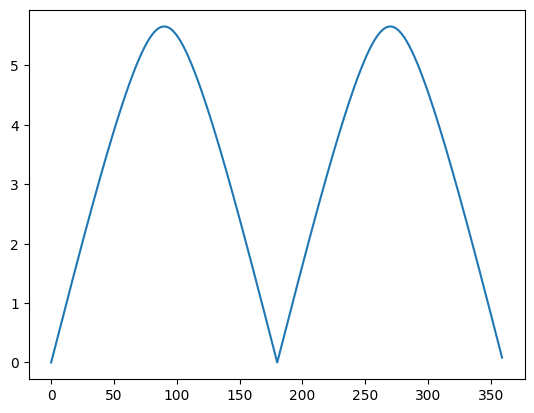

In [278]:
val = list()
for i in range(360):
    a, b, theta = 10, 2, (30 + i) / 180 * np.pi
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])
    scale_matrix = np.diag([a**2 / 4, b**2 / 4])  # 주축/보조축 길이에 따른 스케일링
    covariance_matrix_2 = rotation_matrix @ scale_matrix @ rotation_matrix.T
    val.append(wasserstein_distance_covariance(covariance_matrix, covariance_matrix_2))
plt.plot(val)

In [412]:
a, b, theta = 2, 3, 0 / 180 * np.pi
cos_theta = np.cos(theta)
sin_theta = np.sin(theta)
rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])
scale_matrix = np.diag([a**2 / 4, b**2 / 4])  # 주축/보조축 길이에 따른 스케일링
covariance_matrix = rotation_matrix @ scale_matrix @ rotation_matrix.T


a, b, theta = 6, 5, (0+60) / 180 * np.pi
cos_theta = np.cos(theta)
sin_theta = np.sin(theta)
rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])
scale_matrix = np.diag([a**2 / 4, b**2 / 4])  # 주축/보조축 길이에 따른 스케일링
covariance_matrix_2 = rotation_matrix @ scale_matrix @ rotation_matrix.T
wasserstein_distance_covariance(covariance_matrix, covariance_matrix_2)

2.1501885762932713

In [408]:
np.sqrt(13 / 4)

1.8027756377319946

[array([[0.26584197, 0.1111354 ],
       [0.1111354 , 2.73912039]]), array([[ 0.44585208, -0.1788897 ],
       [-0.1788897 ,  3.79298532]]), array([[0.09698259, 0.60228522],
       [0.60228522, 3.95885023]]), array([[ 1.36701326, -0.91843702],
       [-0.91843702,  1.87144727]]), array([[ 0.71720934, -0.24077601],
       [-0.24077601,  2.17683723]]), array([[ 1.59770124, -0.44292785],
       [-0.44292785,  0.17846112]]), array([[ 0.80483538, -0.22715144],
       [-0.22715144,  1.30976936]]), array([[ 2.77748869, -1.19138964],
       [-1.19138964,  0.52923733]]), array([[0.65334186, 0.35571187],
       [0.35571187, 0.24228115]]), array([[ 0.42665981, -0.31535838],
       [-0.31535838,  4.99834959]]), array([[0.46671112, 0.24851079],
       [0.24851079, 0.28636479]]), array([[0.56132532, 0.26144527],
       [0.26144527, 0.12202104]]), array([[0.46429431, 0.17350015],
       [0.17350015, 0.97248437]]), array([[ 0.78473448, -0.15970067],
       [-0.15970067,  0.48829776]]), array([[ 0.5874

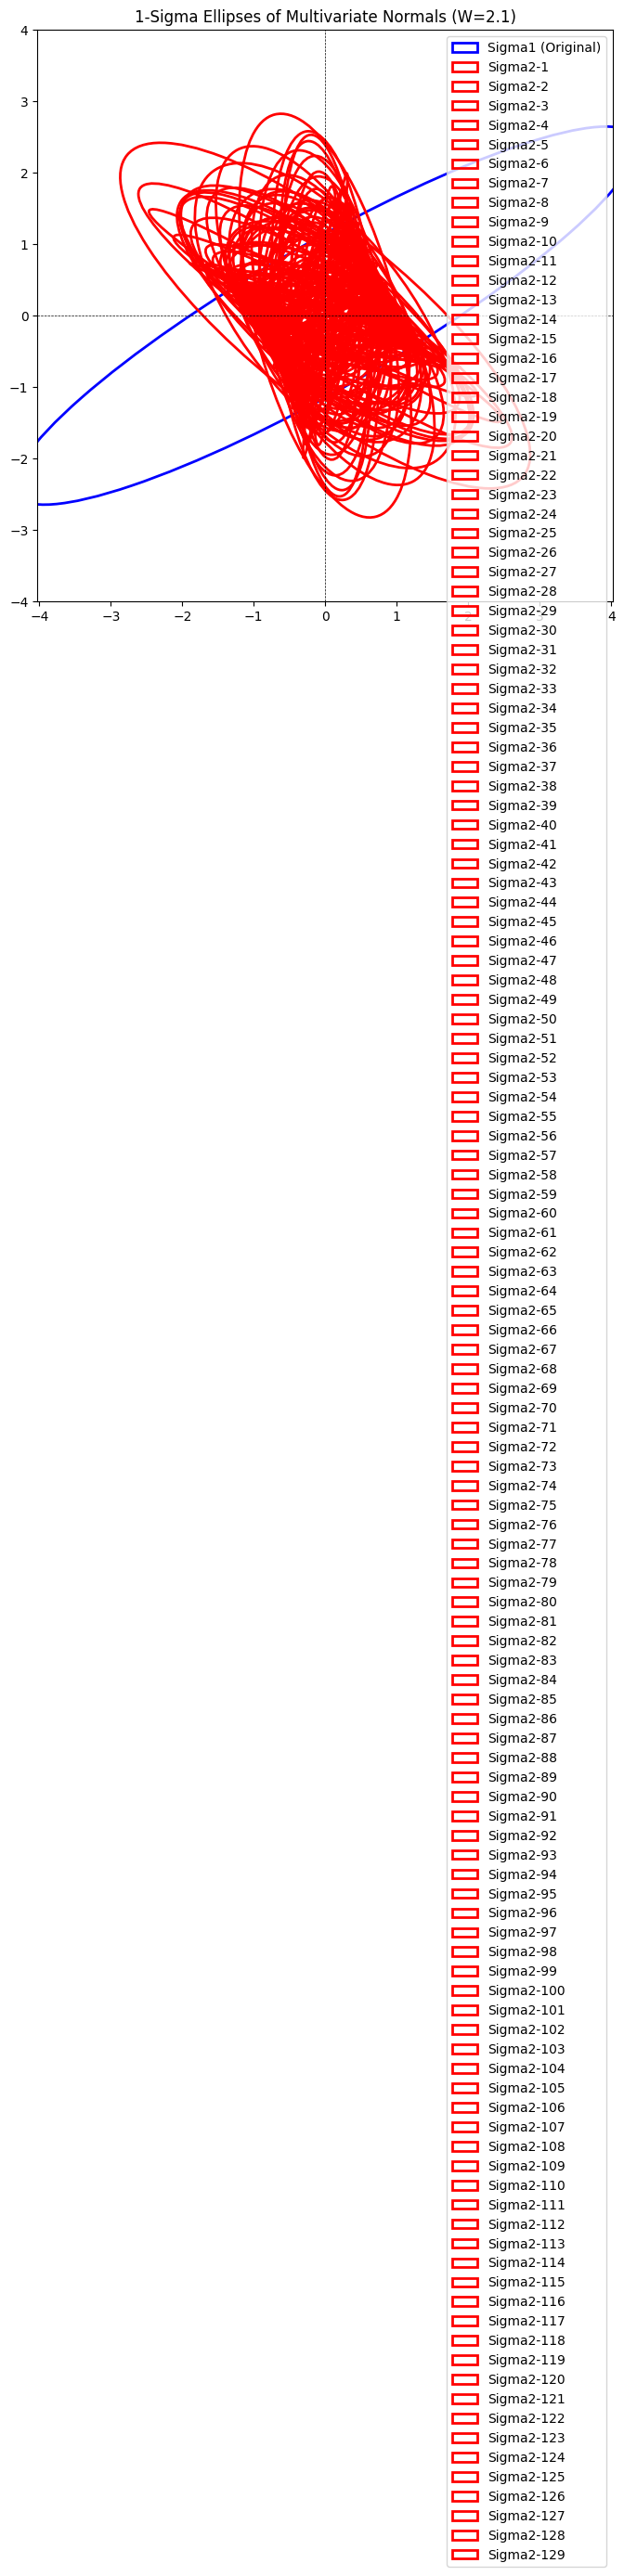

In [162]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm

# 기본값 설정
np.random.seed(42)
dim = 2  # 차원 설정
Sigma1 = covariance_matrix#np.array([[5.0, 0.5], [0.5, 1.0]])  # 기본 공분산 행렬
W_target = 4.2  # 목표 Wasserstein 거리

# Wasserstein 거리 조건을 만족하는 Sigma2 생성
def generate_sigma2(Sigma1, W_target, num_samples=100):
    Sigma2_list = []
    for _ in range(num_samples):
        # 무작위 대칭 행렬 생성
        A = np.random.randn(dim, dim)
        Sigma2_candidate = np.dot(A, A.T)  # 공분산 행렬 조건

        # Wasserstein 거리 계산
        sqrt_Sigma1 = sqrtm(Sigma1)
        middle_term = sqrtm(np.dot(sqrt_Sigma1, np.dot(Sigma2_candidate, sqrt_Sigma1)))
        W2 = np.trace(Sigma1 + Sigma2_candidate - 2 * middle_term)
        W = np.sqrt(W2)
        if np.isclose(W, W_target, atol=0.1):  # 오차 범위 내
            Sigma2_list.append(Sigma2_candidate)

    return Sigma2_list

# Sigma2 생성
Sigma2_list = generate_sigma2(Sigma1, W_target, num_samples=1000)
print(Sigma2_list)

from matplotlib.patches import Ellipse

def plot_1sigma_ellipses(Sigma_list, colors, ax, labels=None):
    for i, Sigma in enumerate(Sigma_list):
        # 1-sigma 타원 생성
        vals, vecs = np.linalg.eigh(Sigma)
        order = vals.argsort()[::-1]
        vals, vecs = vals[order], vecs[:, order]
        theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
        width, height = 2 * np.sqrt(vals)  # 1-sigma scaling
        ell = Ellipse(
            xy=(0, 0),
            width=width,
            height=height,
            angle=theta,
            edgecolor=colors[i],
            facecolor="none",
            linewidth=2,
            label=labels[i] if labels else None,
        )
        ax.add_patch(ell)


# 색상 설정
colors = ["blue"] + ["red"] * len(Sigma2_list)

# 플롯 설정
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.axhline(0, color="black", linewidth=0.5, linestyle="--")
ax.axvline(0, color="black", linewidth=0.5, linestyle="--")
ax.set_aspect("equal", adjustable="datalim")
ax.set_title("1-Sigma Ellipses of Multivariate Normals (W=2.1)")

# 타원 플롯
Sigma_list = [Sigma1] + Sigma2_list
labels = ["Sigma1 (Original)"] + [f"Sigma2-{i+1}" for i in range(len(Sigma2_list))]
plot_1sigma_ellipses(Sigma_list, colors, ax, labels=labels)

# 범례 추가
ax.legend()
plt.show()
